In [6]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from gibbs_sampling import gibbs
figure_path = "/Users/conorosully/Google Drive/Trinity/S2/Applied Statistical Modelling/A2/doc/Sections/Figures/{}"


## Part 1

1. I want you to compare the ratings of currently open Indian restaurants in the
neighbourhoods of Scarborough and Etobicoke. Which neighborhood is best for
this kind of food? How much better?

### Methodology <br>
<ul>
    <li> Means
        <li> Wighted means - we would expect the review_count to give us an idication of how reliable a stars rating is. 
            <li> box plots
                <li> Gibbs sampling
</ul>

In [2]:
part1A = pd.read_csv('data/question1_1A.csv')
print(len(part1A))
part1A.head(1)

48


,business_id,name,neighborhood,review_count,stars
0,YLeAUkFFJri_21uTkyrVFg,Malaysian Garam Masala,Scarborough,4,4.0


In [3]:
part1B = pd.read_csv('data/question1_1B.csv')
print(len(part1B))
part1B.head(1)

976


,business_id,review_id,stars,name,neighborhood
0,UaMq3DUhtkoZ5WCEQm2T9g,SpSOhzp9EbYCAMTUEkX71g,4,Silver Spoon,Scarborough


In [4]:
print(part1A[part1A['neighborhood']=='Scarborough'].describe())
print(part1A[part1A['neighborhood']=='Etobicoke'].describe())

       review_count      stars
count     34.000000  34.000000
mean      20.176471   3.676471
std       20.427953   0.562494
min        3.000000   2.500000
25%        7.000000   3.500000
50%       12.000000   3.500000
75%       29.250000   4.000000
max       81.000000   4.500000
       review_count      stars
count     14.000000  14.000000
mean      20.642857   3.357143
std       18.755951   0.949262
min        3.000000   1.000000
25%        4.750000   2.750000
50%       15.000000   3.500000
75%       30.750000   4.000000
max       58.000000   4.500000


In [5]:
part1A[part1A['stars'] == 4.5][0:2]

,business_id,name,neighborhood,review_count,stars
2,A7IQT6RYVSWkvEAbiLCdtQ,Desi Spice,Etobicoke,30,4.5
11,zwMg7Qey7suZIw31S3jKmA,Araliya Take-out & Catering,Scarborough,3,4.5


In [27]:
# Mean weighted by review_count
n = 'Scarborough'
for n in ['Scarborough','Etobicoke']:
    count = part1A[part1A['neighborhood'] == n]['review_count']
    stars = part1A[part1A['neighborhood'] == n]['stars']
    print(n,sum(stars*count)/sum(count))

Scarborough 3.7820699708454812
Etobicoke 3.801038062283737


Scaraborough has a higher mean and lower standard deviation than Ebitocoke. This is the mean of the average ratings for the resturants.

Table X shows the mean and weighted mean of the stars of  resturants in the two neighborhoods. We see that the standard mean of Scarborough is 0.32 units higher than that of Etobicoke. However, when we take into account the number of reviews we see this is no longer the case as Etobicoke weighted mean is 0.02 units higher. 

Figure X shows the boxplot of stars for each resturant. The max, upper quartile and median are they same for each neighboorhood. These values are  4.5, 4 and 3.5 respectfully.

In [13]:
print(part1B[part1B['neighborhood']=='Scarborough'].describe())
print(part1B[part1B['neighborhood']=='Etobicoke'].describe())

            stars
count  687.000000
mean     3.783115
std      1.246970
min      1.000000
25%      3.000000
50%      4.000000
75%      5.000000
max      5.000000
            stars
count  289.000000
mean     3.861592
std      1.320858
min      1.000000
25%      3.000000
50%      4.000000
75%      5.000000
max      5.000000


Now if the individual review dataset is analysed we see the mean of the Ebitocoke is higher. Notice the respective standard deviations are both greater than for the corresponfing standard deciations of the average ratings. This makes sense as we would expect some variance to be removed when considering means of the ratings.

#### Boxplots

/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.

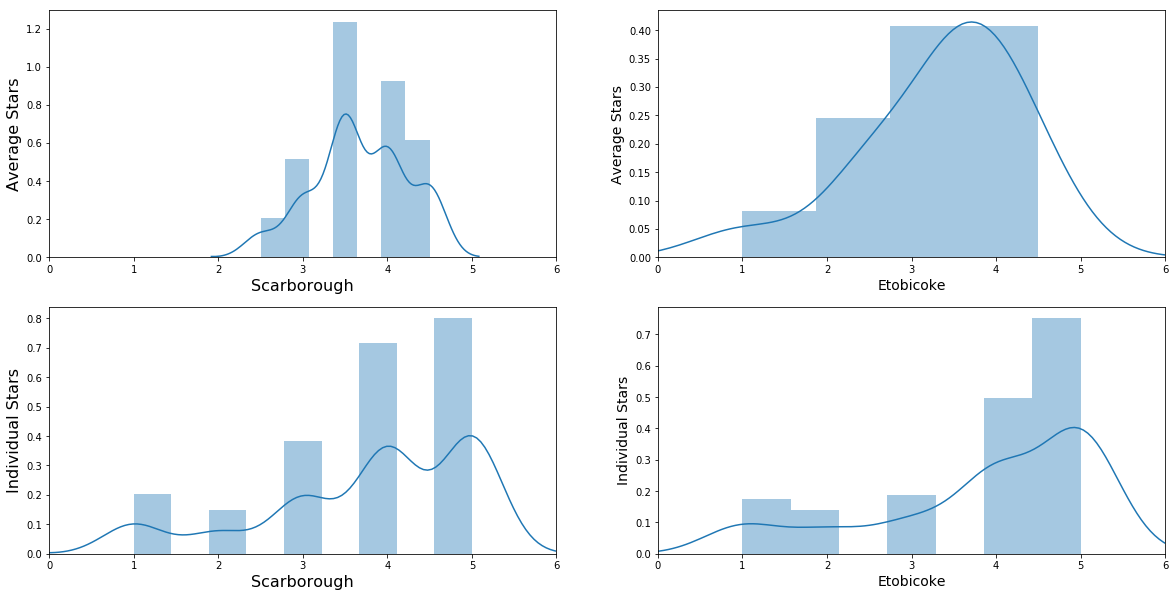

In [8]:
fig, ax = plt.subplots( nrows=2, ncols=2,figsize=(20,10))

plt.axes(ax[0,0])
sns.distplot(part1A[part1A['neighborhood'] == 'Scarborough']['stars'])
plt.ylabel("Average Stars",size=16)
plt.xlabel('Scarborough',size=16)
plt.xlim(0, 6)

plt.axes(ax[0,1])
sns.distplot(part1A[part1A['neighborhood'] == 'Etobicoke']['stars'])
plt.ylabel("Average Stars",size=14)
plt.xlabel('Etobicoke',size=14)
plt.xlim(0, 6)


plt.axes(ax[1,0])
sns.distplot(part1B[part1B['neighborhood'] == 'Scarborough']['stars'])
plt.ylabel("Individual Stars",size=16)
plt.xlabel('Scarborough',size=16)
plt.xlim(0, 6)

plt.axes(ax[1,1])
sns.distplot(part1B[part1B['neighborhood'] == 'Etobicoke']['stars'])
plt.ylabel("Individual Stars",size=14)
plt.xlabel('Etobicoke',size=14)
plt.xlim(0, 6)

filename = "star_distributions.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)


We can take a closer look at the distibution plots. For the average stars, Scarborough has hgiher mean and more naroow. This was refelxted in the mean and variance calcualtion. We can see when we look at the distibutions of the individual ratings, the distibutions become more spread out. 

In [13]:
def gibbs_2(part,p):
    y = part['stars']
    ind = pd.Series([1 if x == 'Scarborough' else 2 for x in part['neighborhood']])

    mu0 = 3
    tau0 = 1.1378
    del0 = 0 
    gamma0 = 1.0256
    a0 = 2
    b0 = 1.7578


    samples = gibbs.gibbs_difference(y,ind,mu0, tau0, del0, gamma0, a0, b0,maxiter=5000)
    des = samples.describe(percentiles=[0.025,0.975])
    filename = "gibbs_{}.csv".format(p)
    des.to_csv(figure_path.format(filename))
    print(des)
    print()
    
    fig, ax = plt.subplots( nrows=1, ncols=2,figsize=(20,10))

    plt.axes(ax[0])
    plt.hist(samples['mu'])
    plt.ylabel("Frequency",size=16)
    plt.xlabel('Mu',size=16)

    plt.axes(ax[1])
    plt.hist(samples['tau'])
    plt.ylabel("Frequency",size=16)
    plt.xlabel('Tau',size=16)
    filename = "mutau_{}.eps".format(p)
    plt.savefig(figure_path.format(filename),format='eps',dpi=1000)
    
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,8))

    plt.hist(samples['del'])
    plt.axvline(x=des['del']['2.5%'],color='r', linestyle='--')
    plt.axvline(x=des['del']['mean'],color='r', linestyle='--')
    plt.axvline(x=des['del']['97.5%'],color='r', linestyle='--')

    plt.ylabel("Frequency",size = 14)
    plt.xlabel("Value of Delta",size = 14)
    
    filename = "del_{}.eps".format(p)
    plt.savefig(figure_path.format(filename),format='eps',dpi=1000)
    
    
    print("Delta 0 is grater than: {}".format(sum(samples['del']<0)/len(samples['del'])))
    
    
    y1_sim = np.random.normal(samples['mu']+samples['del'],samples['theta'])
    y2_sim = np.random.normal(samples['mu']-samples['del'],samples['theta'])

    outcome = y1_sim > y2_sim
    print("Probability Scarbourough > Epicot: {}".format(outcome.mean()))


We can gain a deaper understanding with a heirerical model. See Figure X, Where
<ul>
    <li>U is the group mean
        <li> d is the differnece bwtween means
           <li> Tau is the shared variance 
    <ul>
We assum a normal prior distribution for U and D and a gamma prior distribution. Choose priors: (see paper). using gibbs sampling with 5000 itterations we can obtain the posterior distributions. 

                mu          del          tau        theta
count  5000.000000  5000.000000  5000.000000  5000.000000
mean      3.511963     0.159168     1.946439     0.727618
std       0.116018     0.114952     0.387720     0.073868
min       3.069701    -0.261905     0.891143     0.520971
2.5%      3.281101    -0.066507     1.260608     0.600841
50%       3.513051     0.159130     1.914875     0.722653
97.5%     3.740233     0.385328     2.770007     0.890656
max       3.946287     0.588946     3.684450     1.059318



/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


Delta 0 is grater than: 0.0818
Probability Scarbourough > Epicot: 0.6276


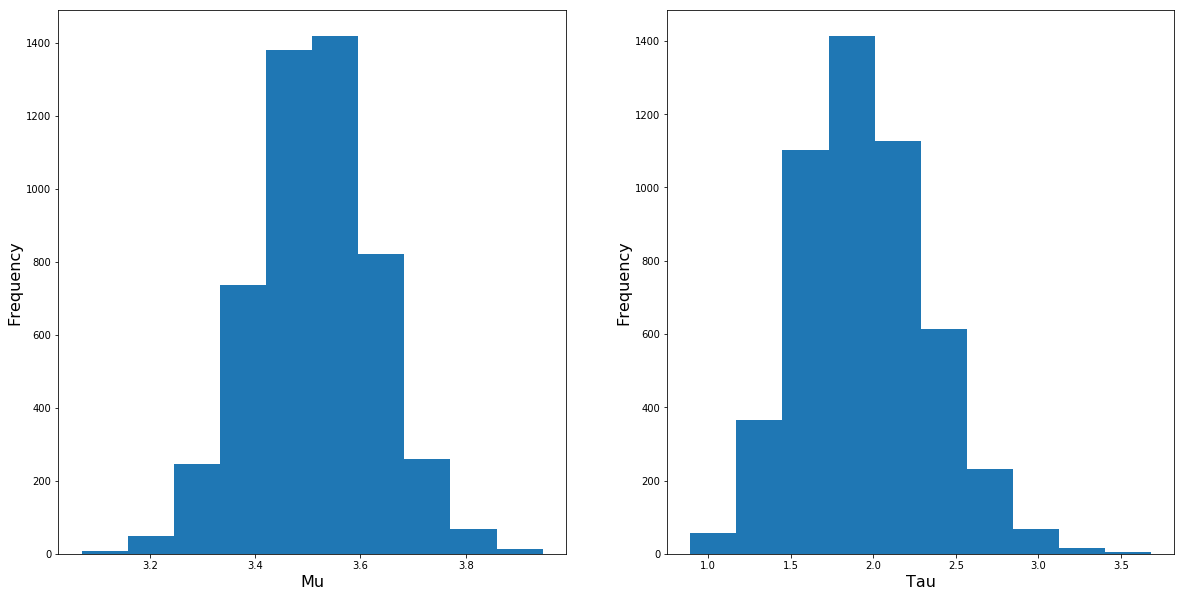

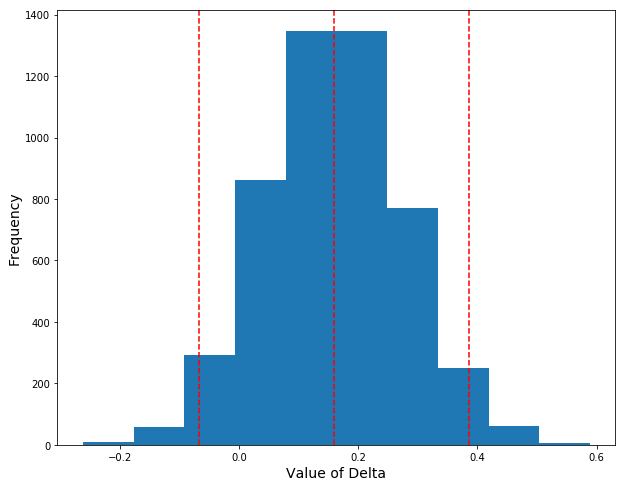

In [14]:
gibbs_2(part1A,"A")

Mu and Delay have normal posterior distributions. tau has a gamma poasterior distribution. We can see that the mean of del is 0.162588 suggesting that S > E. However, this value is quite close to 0 and if look we can see that it falls within the 95% confiden interval. This is shown clearly by Figure X. The 3 lines give the 2.5%quartile, mean and 97.5% quartile for the similated values of delta, we see that 0 values with it the two quartiles. In other words is del is not significantly differnet for 0. By summing samples <0 / samples we get that delta 0 is 0.0846. i.e. 0 is the 8.46% quantile for 

We can go further an the propabilty that S > E. Exmplain how.. 0.6076 there is a higher probablity that S > E 

                mu          del          tau        theta
count  5000.000000  5000.000000  5000.000000  5000.000000
mean      3.821065    -0.038918     0.622081     1.268834
std       0.044099     0.044584     0.027895     0.028521
min       3.652325    -0.194267     0.522744     1.172719
2.5%      3.736211    -0.126251     0.567261     1.215383
50%       3.821032    -0.039178     0.621768     1.268194
97.5%     3.906328     0.048156     0.676977     1.327726
max       3.983264     0.122431     0.727130     1.383106

Delta 0 is grater than: 0.8092
Probability Scarbourough > Epicot: 0.4838


/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


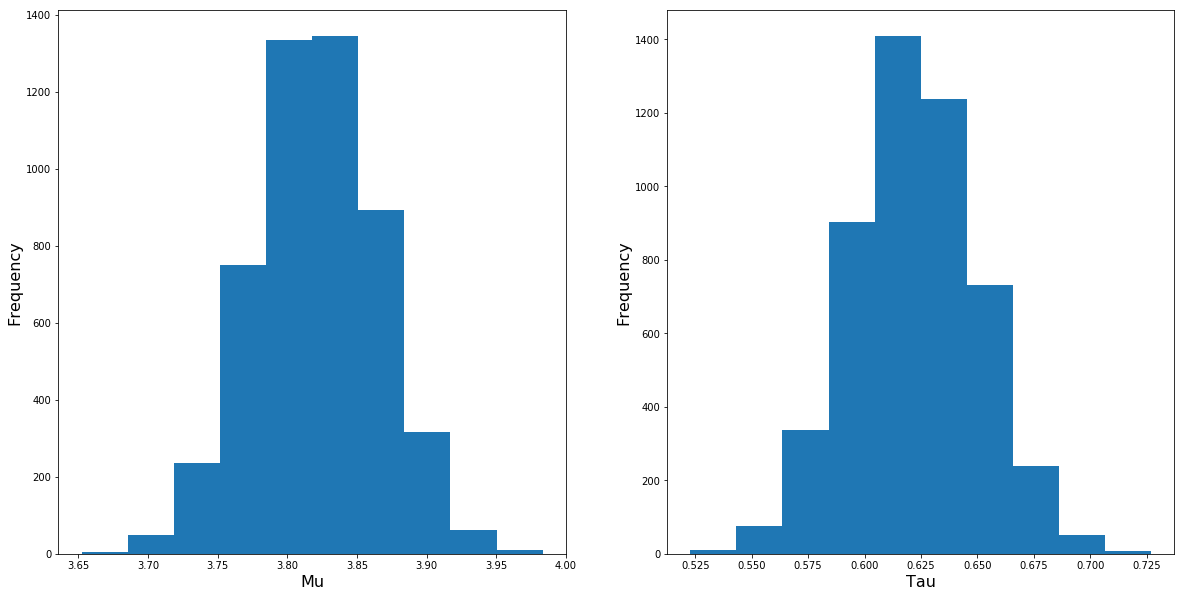

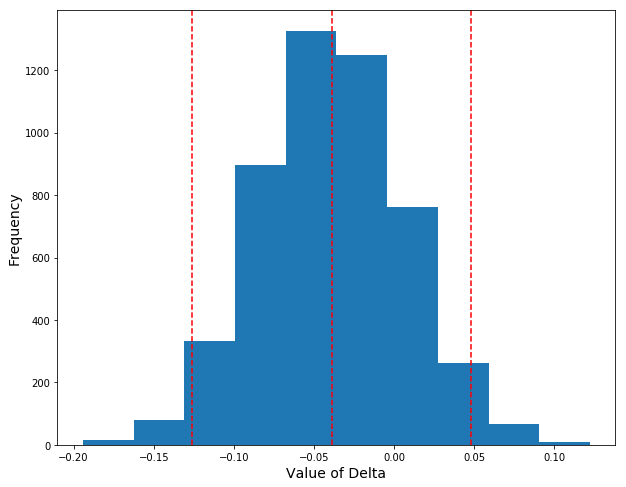

In [17]:
gibbs_2(part1B,"B")

Similar results but oposite results. 

Theta greater this time

Coclusion: no statisticall difference 

## Part 2

Compare the ratings of (open) restaurants
across multiple different neighbourhoods in the city. Are any neighbourhoods
clearly superior to others? If so, by how much?

In [18]:
part2 = pd.read_csv('data/question1_2.csv')
print(part2['neighborhood'].nunique())
print(len(part2))
part2.head()

71
4028


,business_id,name,neighborhood,review_count,stars
0,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,Leslieville,39,3.5
1,dTWfATVrBfKj7Vdn0qWVWg,Flavor Cuisine,Scarborough,6,3.0
2,sJ0MYSAIVK28cMzh-s-NPA,Amaya Express,Downtown Core,34,2.5
3,JmKgz6n7zn24F-WkgT-kiA,Maki My Way,St. Lawrence,7,4.5
4,t8yi2l7pZF43Rlf9_lHdDA,Hero Certified Burgers - King & Yonge,Downtown Core,29,2.5


In [19]:
order = part2[['neighborhood','stars']].groupby(['neighborhood'],as_index=False).median()
order = order.sort_values(['stars'])['neighborhood'] 

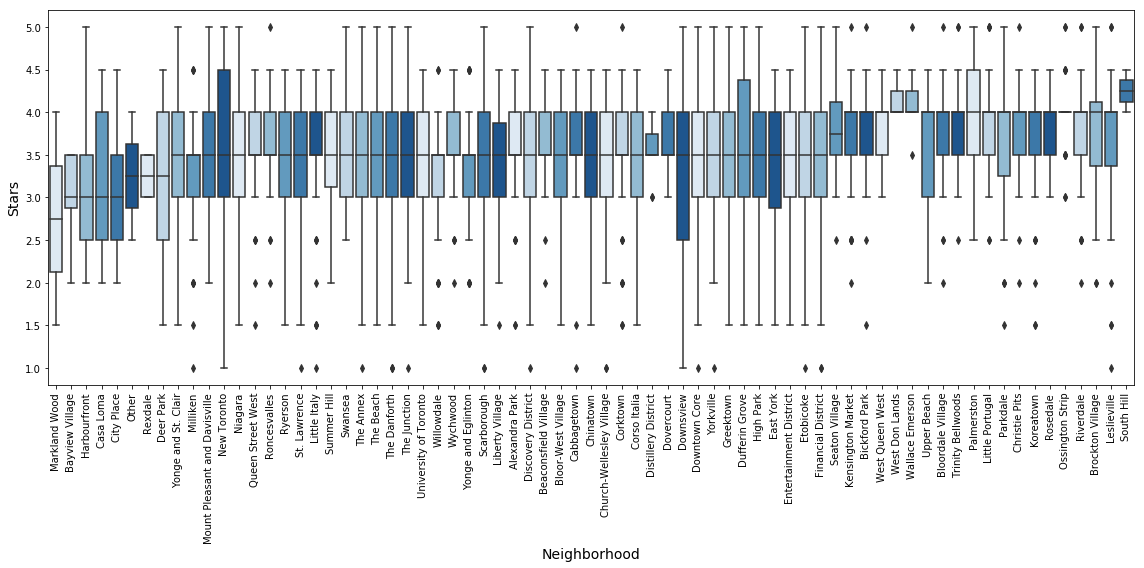

In [30]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(16,8))
sns.boxplot(y = part2['stars'],x = part2['neighborhood'],order=order,palette=sns.color_palette("Blues"))
#plt.title("Hello",size = 18)
plt.ylabel("Stars",size = 14)
plt.xlabel("Neighborhood",size = 14)
plt.xticks(rotation=90)
plt.tight_layout()
filename = "multigibbs_boxplot.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)


In [23]:
y = part2['stars']
ind = part2['neighborhood']


theta_mat,mat_store = gibbs.gibbs_m(y,ind,
                                    mu0 = 3, 
                                    gamma0 = 1.1378,
                                    eta0 = 2, 
                                    t0 = 1.7578, 
                                    a0 = 2, 
                                    b0 = 1.7578,
                                    maxiter=5000)

0/5000
500/5000
1000/5000
1500/5000
2000/5000
2500/5000
3000/5000
3500/5000
4000/5000
4500/5000


In [25]:
filename = "multigibbs_summary.csv"
des = round(mat_store.describe(),4)
des.to_csv(figure_path.format(filename))
des

,mu,tau_w,tau_b,theta_w,theta_b
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,3.5165,1146.6889,8.5724,0.0295,0.3451
std,0.0408,26.0407,1.4140,0.0003,0.0289
min,3.3382,1053.8715,4.1792,0.0285,0.2652
25%,3.4889,1129.1141,7.5856,0.0293,0.3248
50%,3.5167,1146.5131,8.4958,0.0295,0.3431
75%,3.5429,1164.1017,9.4812,0.0298,0.3631
max,3.6756,1232.4452,14.2157,0.0308,0.4892


/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


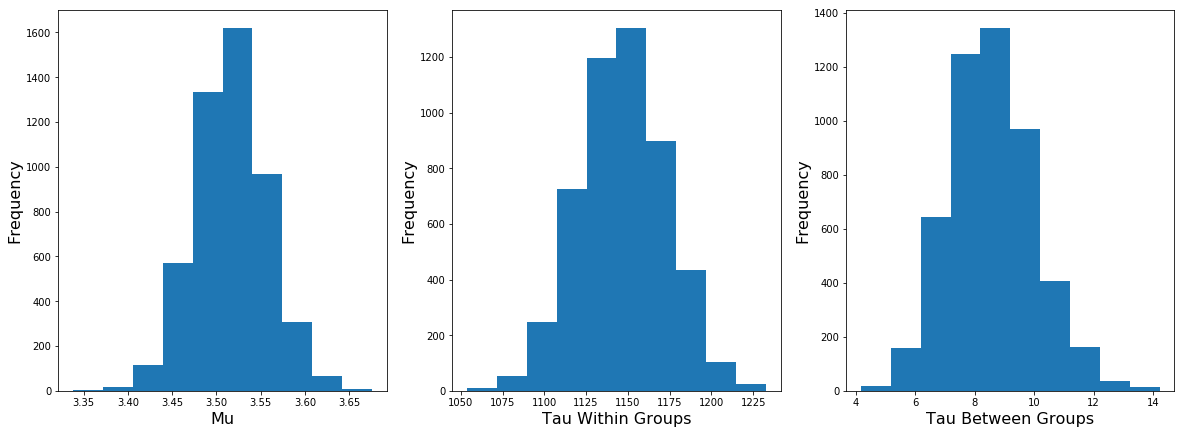

In [26]:
fig, ax = plt.subplots( nrows=1, ncols=3,figsize=(20,7))

plt.axes(ax[0])
plt.hist(mat_store['mu'])
plt.ylabel("Frequency",size=16)
plt.xlabel('Mu',size=16)

plt.axes(ax[1])
plt.hist(mat_store['tau_w'])
plt.ylabel("Frequency",size=16)
plt.xlabel('Tau Within Groups',size=16)

plt.axes(ax[2])
plt.hist(mat_store['tau_b'])
plt.ylabel("Frequency",size=16)
plt.xlabel('Tau Between Groups',size=16)

filename = "multigibbs_distribution.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)

In [27]:
desc = theta_mat.describe(percentiles=[0.025,0.975])
desc = desc.transpose().sort_values(['mean'], ascending=False)
desc

,count,mean,std,min,2.5%,50%,97.5%,max
South Hill,5000.0,4.247758,0.020949,4.180596,4.206904,4.247610,4.289114,4.325250
West Don Lands,5000.0,4.164509,0.017556,3.827734,4.131270,4.164452,4.198335,4.226899
Wallace Emerson,5000.0,4.142128,0.011579,4.059600,4.119467,4.142228,4.164412,4.181644
Ossington Strip,5000.0,3.985145,0.005153,3.968467,3.975298,3.985126,3.995214,4.059615
Palmerston,5000.0,3.954118,0.008912,3.877780,3.936954,3.953958,3.971429,3.990444
Little Portugal,5000.0,3.866621,0.006178,3.654839,3.856027,3.866760,3.877373,3.884545
Trinity Bellwoods,5000.0,3.860041,0.006955,3.605916,3.848612,3.860055,3.871572,3.879505
West Queen West,5000.0,3.841765,0.007712,3.581749,3.828511,3.841629,3.854955,3.867430
Seaton Village,5000.0,3.799721,0.006677,3.697604,3.787020,3.799743,3.812649,3.826914
Rosedale,5000.0,3.799581,0.014553,3.375409,3.773851,3.799852,3.825181,3.851791


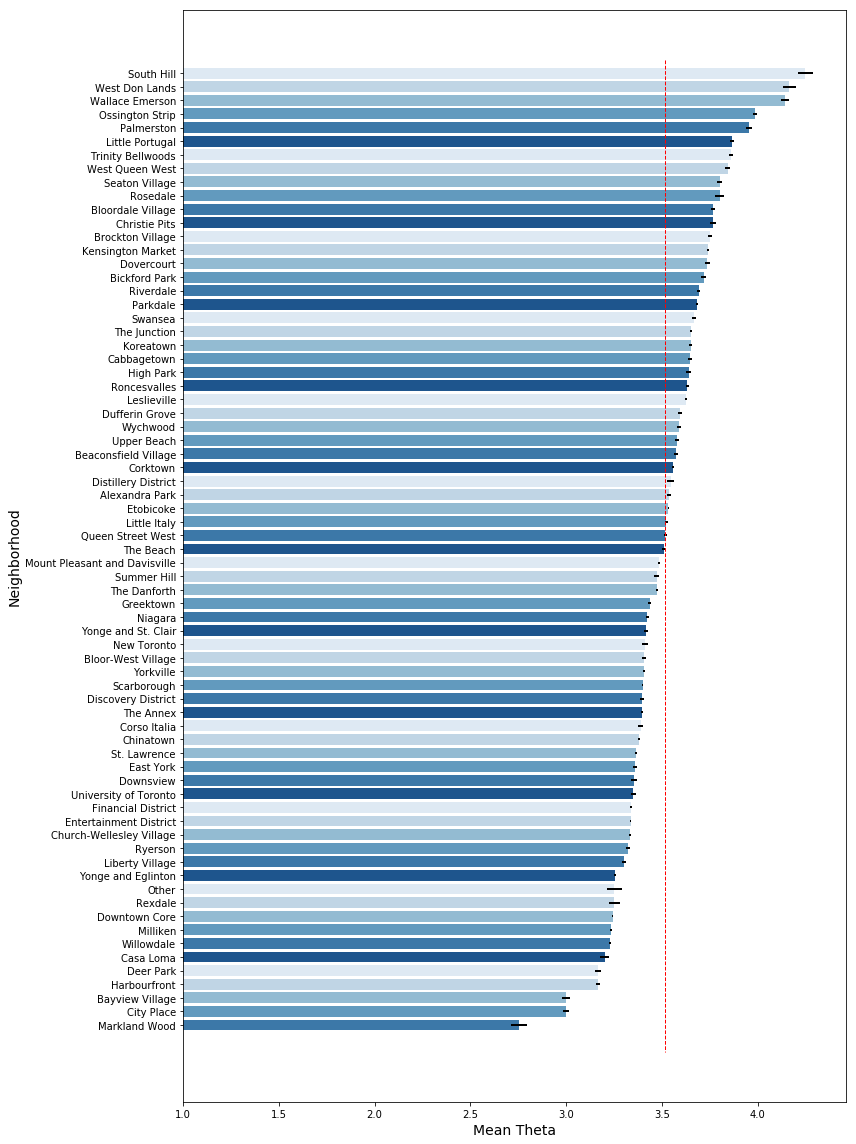

In [31]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(12,16))
sns.barplot(x=desc['mean'], y =desc.index ,palette=sns.color_palette("Blues"))
plt.ylabel("Neighborhood",size = 14)
plt.xlabel("Mean Theta",size = 14)
plt.xlim(left=1)
for i in range(len(desc)):
    plt.hlines(y = i, xmin=desc['2.5%'][i], xmax = desc['97.5%'][i], color = 'k', linewidth=2 )
    
plt.vlines(x=desc['mean'].mean(),ymin=-1,ymax=72,color = 'r', linewidth=1,linestyles='--' )
plt.tight_layout()
filename = "multigibbs_theta.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)

Some confidence itervals may be unrealiable as there are two few records for the. This would lower the variance for the 